In [16]:
import pandas as pd


In [17]:
import numpy as np


In [19]:
import matplotlib.pyplot as plt

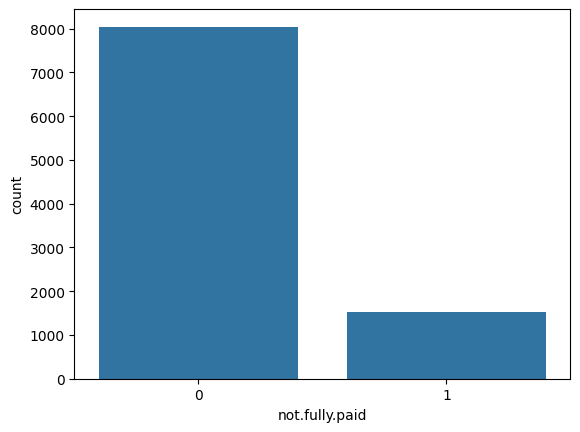

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='not.fully.paid', data=df)
plt.show()


In [25]:
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']


In [26]:
X = pd.get_dummies(X, columns=['purpose'], drop_first=True)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=3000)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1596   13]
 [ 293   14]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1609
           1       0.52      0.05      0.08       307

    accuracy                           0.84      1916
   macro avg       0.68      0.52      0.50      1916
weighted avg       0.79      0.84      0.78      1916



In [33]:
model = LogisticRegression(
    max_iter=3000,
    class_weight='balanced'
)

model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=3000)

In [34]:
y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1052  557]
 [ 132  175]]
              precision    recall  f1-score   support

           0       0.89      0.65      0.75      1609
           1       0.24      0.57      0.34       307

    accuracy                           0.64      1916
   macro avg       0.56      0.61      0.55      1916
weighted avg       0.78      0.64      0.69      1916



In [23]:
df.isnull().sum()


,0
credit.policy,0
purpose,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0


In [21]:
df.columns


Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [20]:
import pandas as pd
df = pd.read_csv("loan_data.csv")
df.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
